# Gamma Ray Spectroscopy Lab Analysis
This notebook contains the analysis of the gamma ray spectroscopy of different radioactive elements to find their half widths and linear attenuation coefficients. This was done during my 2nd year of university.

In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def straightline(m,x,c):
    """Returns the y value for a straight line with inputs:
    x coordinate (x)
    gradient (m)
    y-intercept (c)"""
    y = m*x+c
    return y

In [3]:
def find_x(y,m,c):
    """Finds the value of x for a straight line graph when y is known."""
    return (y-c)/m

In [4]:
def sigma_add_calc(arr):
    """Does error propagation (for addition) on 3 values of sigma given in an array."""
    sig = np.sqrt(arr[0]**2+arr[1]**2+arr[2]**2)
    return sig

In [5]:
def sigma_times(a,A,b,B,C):
    """Does error propagation (for multiplication/division) on 2 values of sigma given. Lowercase letters are the errors,
    capital letters are the values. C is the output value that needs an uncertainty."""
    sig = C*np.sqrt((a/A)**2+(b/B)**2)
    return sig

## Experiment 2
Error on the gaussians are given by $\sigma_x$ recorded in the lab book, error on the mean must be recorded to find the uncertainty.

In [6]:
# Import data from a csv file
datafile = 'Gamma Exp 2 Data.csv'
data = np.genfromtxt(datafile,skip_header=2, delimiter=',', unpack=True)
data

array([[1185.6 , 1183.5 , 1184.9 ],
       [  26.3 ,   26.  ,   26.7 ],
       [1342.9 , 1343.2 , 1343.2 ],
       [  27.2 ,   26.9 ,   28.4 ],
       [ 507.9 ,  507.7 ,  507.6 ],
       [  17.7 ,   18.4 ,   19.5 ],
       [1282.6 , 1287.3 , 1286.6 ],
       [  30.1 ,   25.7 ,   33.3 ],
       [  24.1 ,   24.1 ,   24.2 ],
       [   4.34,    4.15,    3.97],
       [ 667.7 ,  667.4 ,  667.5 ],
       [  20.1 ,   20.4 ,   20.3 ]])

In [7]:
# Sorting data
co60_mu1_data = data[0]
co60_sig1_data = data[1]
co60_mu2_data = data[2]
co60_sig2_data = data[3]
na22_mu1_data = data[4]
na22_sig1_data = data[5]
na22_mu2_data = data[6]
na22_sig2_data = data[7]
mix_mu1_data = data[8]
mix_sig1_data = data[9]
mix_mu2_data = data[10]
mix_sig2_data = data[11]

Error propagation when C = A + B done with eqn: 
$$ \Delta C = \sqrt{\Delta A^2 + \Delta B^2} $$

In [8]:
# Find mean values for the data, as well as the sigma corresponding to the mean
co60_mu1 = co60_mu1_data.mean()
co60_sig1 = sigma_add_calc(co60_sig1_data)
co60_mu2 = co60_mu2_data.mean()
co60_sig2 = sigma_add_calc(co60_sig2_data)
na22_mu1 = na22_mu1_data.mean()
na22_sig1 = sigma_add_calc(na22_sig1_data)
na22_mu2 = na22_mu2_data.mean()
na22_sig2 = sigma_add_calc(na22_sig2_data)
mix_mu1 = mix_mu1_data.mean()
mix_sig1 = sigma_add_calc(mix_sig1_data)
mix_mu2 = mix_mu2_data.mean()
mix_sig2 = sigma_add_calc(mix_sig2_data)

In [9]:
print(f'Co-60 mu1 = {co60_mu1} +/- {co60_sig1} keV')
print(f'Co-60 mu2 = {co60_mu2} +/- {co60_sig2} keV')

Co-60 mu1 = 1184.6666666666667 +/- 45.61337523139457 keV
Co-60 mu2 = 1343.1000000000001 +/- 47.64462194204084 keV


In [10]:
print(f'Na-22 mu1 = {na22_mu1} +/- {na22_sig1} keV')
print(f'Na-22 mu2 = {na22_mu2} +/- {na22_sig2} keV')

Na-22 mu1 = 507.7333333333333 +/- 32.126313202731495 keV
Na-22 mu2 = 1285.4999999999998 +/- 51.72417229883916 keV


In [11]:
print(f'Mixed mu1 = {mix_mu1} +/- {mix_sig1} keV')
print(f'Mixed mu2 = {mix_mu2} +/- {mix_sig2} keV')

Mixed mu1 = 24.133333333333336 +/- 7.198541518946738 keV
Mixed mu2 = 667.5333333333333 +/- 35.103561072916804 keV


## Experiment 3
Start by doing the same data analysis as in experiment 2.

In [12]:
datafile2 = 'Gamma Exp 3 Data.csv'
data2 = np.genfromtxt(datafile2,skip_header=2, delimiter=',', unpack=True)
data2

array([[1.0000e+01, 1.0000e+01, 1.0000e+01, 6.0000e+00, 6.0000e+00,
        6.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.1778e+03, 1.1781e+03, 1.1852e+03, 1.1776e+03, 1.1842e+03,
        1.1803e+03, 1.1821e+03, 1.1822e+03, 1.1842e+03, 1.1821e+03,
        1.1816e+03, 1.1816e+03, 1.1841e+03, 1.1818e+03, 1.1818e+03],
       [1.3404e+03, 1.3410e+03, 1.3400e+03, 1.3404e+03, 1.3405e+03,
        1.3411e+03, 1.3425e+03, 1.3385e+03, 1.3429e+03, 1.3387e+03,
        1.3428e+03, 1.3428e+03, 1.3406e+03, 1.3443e+03, 1.3413e+03],
       [3.4900e+01, 3.0500e+01, 2.5300e+01, 2.9100e+01, 2.6400e+01,
        2.8500e+01, 3.9800e+01, 2.9300e+01, 2.8500e+01, 2.5500e+01,
        3.9100e+01, 2.6300e+01, 2.4200e+01, 3.7100e+01, 2.2700e+01],
       [2.3800e+01, 2.6800e+01, 3.1600e+01, 2.3600e+01, 3.0600e+01,
        3.1000e+01, 2.2800e+01, 2.5000e+01, 3.2100e+01, 3.1600e+01,
        2.6700e+01, 2.5400e+01, 3.0100e+01, 

In [13]:
# Sort the data for Co-60 with Lead
coPB10_mu1 = data2[1][0:3].mean()
coPB10_mu2 = data2[2][0:3].mean()
coPB6_mu1 = data2[1][3:6].mean()
coPB6_mu2 = data2[2][3:6].mean()
coPB5_mu1 = data2[1][6:9].mean()
coPB5_mu2 = data2[2][6:9].mean()
coPB1_mu1 = data2[1][9:12].mean()
coPB1_mu2 = data2[2][9:12].mean()
coPB0_mu1 = data2[1][12:15].mean()
coPB0_mu2 = data2[2][12:15].mean()

## Linear Attenuation Coefficient
$$ I = I_{0}exp(-\mu x) $$
Where:
* $I$ = Intensity (Count rate)
* $I_0$ = Initial Intensity (Count rate at zero thickness)
* $\mu$ = Linear Attenuation Coefficient
* $x$ = Depth of Material

Can be rearranged to the form:
$$ ln\left({I\over{I_0}}\right) = -\mu x $$
In order to plot a straight line.
## For Co-60 and Lead (Pb)

In [16]:
# Assign variables to the count rates from the data for Co-60
coPb10_1 = data2[5][0:3].mean()/100
coPb10_2 = data2[6][0:3].mean()/100
coPb6_1 = data2[5][3:6].mean()/100
coPb6_2 = data2[6][3:6].mean()/100
coPb5_1 = data2[5][6:9].mean()/100
coPb5_2 = data2[6][6:9].mean()/100
coPb1_1 = data2[5][9:12].mean()/100
coPb1_2 = data2[6][9:12].mean()/100
coPb0_1 = data2[5][12:15].mean()/100 # Count rate with zero material is I_0
coPb0_2 = data2[6][12:15].mean()/100 # Count rate with zero material is I_0

In [17]:
# Calculate error on the mean for the count rates
coPb10_1_err = data2[5][0:3].std(ddof=1)/100
coPb10_2_err = data2[6][0:3].std(ddof=1)/100
coPb6_1_err = data2[5][3:6].std(ddof=1)/100
coPb6_2_err = data2[6][3:6].std(ddof=1)/100
coPb5_1_err = data2[5][6:9].std(ddof=1)/100
coPb5_2_err = data2[6][6:9].std(ddof=1)/100
coPb1_1_err = data2[5][9:12].std(ddof=1)/100
coPb1_2_err = data2[6][9:12].std(ddof=1)/100
coPb0_1_err = data2[5][12:15].std(ddof=1)/100
coPb0_2_err = data2[6][12:15].std(ddof=1)/100

In [18]:
# Make a material thickness array in metres
thickness = np.array([0.01,0.006,0.005,0.001,0])

In [19]:
# Find values for ln(I/I_0)
coPb10_ln1 = np.log(coPb10_1/coPb0_1)
coPb10_ln2 = np.log(coPb10_2/coPb0_2)
coPb6_ln1 = np.log(coPb6_1/coPb0_1)
coPb6_ln2 = np.log(coPb6_2/coPb0_2)
coPb5_ln1 = np.log(coPb5_1/coPb0_1)
coPb5_ln2 = np.log(coPb5_2/coPb0_2)
coPb1_ln1 = np.log(coPb1_1/coPb0_1)
coPb1_ln2 = np.log(coPb1_2/coPb0_2)
coPb0_ln1 = np.log(coPb0_1/coPb0_1)
coPb0_ln2 = np.log(coPb0_2/coPb0_2)

In [20]:
# Make a ln(I/I_0) array
log_intensity1 = np.array([coPb10_ln1, coPb6_ln1, coPb5_ln1, coPb1_ln1, coPb0_ln1])
log_intensity2 = np.array([coPb10_ln2, coPb6_ln2, coPb5_ln2, coPb1_ln2, coPb0_ln2])

In [21]:
# Find the error in ln(I/I_0)
coPb10_ln1_err = abs(sigma_times(coPb10_1_err,coPb10_1, coPb0_1_err, coPb0_1, coPb10_ln1))
coPb10_ln2_err = abs(sigma_times(coPb10_2_err,coPb10_2, coPb0_2_err, coPb0_2, coPb10_ln2))
coPb6_ln1_err = abs(sigma_times(coPb6_1_err,coPb6_1, coPb0_1_err, coPb0_1, coPb6_ln1))
coPb6_ln2_err = abs(sigma_times(coPb6_2_err,coPb6_2, coPb0_2_err, coPb0_2, coPb6_ln2))
coPb5_ln1_err = abs(sigma_times(coPb5_1_err,coPb5_1, coPb0_1_err, coPb0_1, coPb5_ln1))
coPb5_ln2_err = abs(sigma_times(coPb5_2_err,coPb5_2, coPb0_2_err, coPb0_2, coPb5_ln2))
coPb1_ln1_err = abs(sigma_times(coPb1_1_err,coPb1_1, coPb0_1_err, coPb0_1, coPb1_ln1))
coPb1_ln2_err = abs(sigma_times(coPb1_2_err,coPb1_2, coPb0_2_err, coPb0_2, coPb1_ln2))
coPb0_ln1_err = abs(sigma_times(coPb0_1_err,coPb0_1, coPb0_1_err, coPb0_1, coPb0_ln1))
coPb0_ln2_err = abs(sigma_times(coPb0_2_err,coPb0_2, coPb0_2_err, coPb0_2, coPb0_ln2))

In [22]:
# Make an error array for ln(I/I_0)
log_intensity1_err = np.array([coPb10_ln1_err, coPb6_ln1_err, coPb5_ln1_err, coPb1_ln1_err, coPb0_ln1_err])
log_intensity2_err = np.array([coPb10_ln2_err, coPb6_ln2_err, coPb5_ln2_err, coPb1_ln2_err, coPb0_ln2_err])

<ErrorbarContainer object of 3 artists>

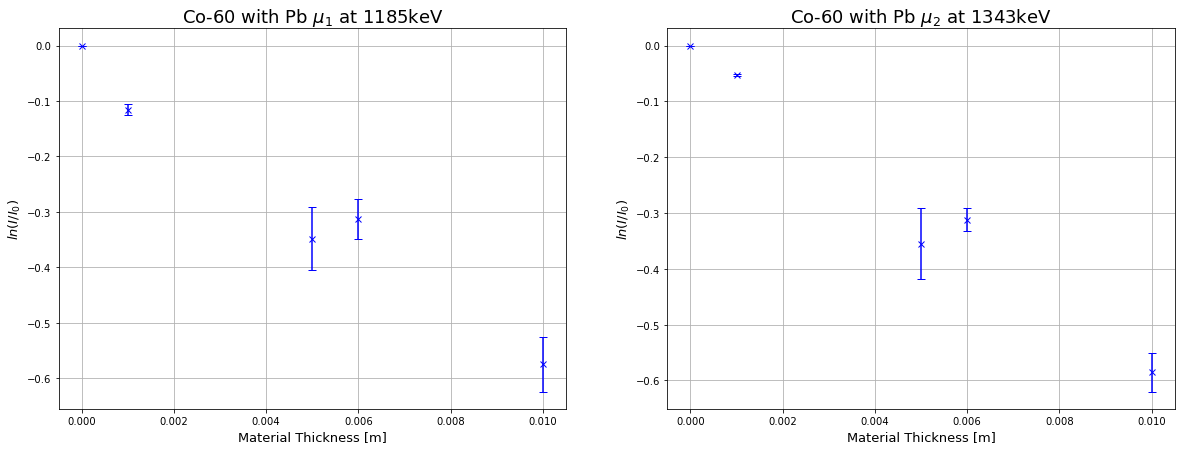

In [24]:
# Plot ln values against thickness
fig2, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)
axs[0].set_xlabel('Material Thickness [m]', fontsize=13), axs[0].set_ylabel('$ln(I/I_0)$', fontsize=13)
axs[1].set_xlabel('Material Thickness [m]', fontsize=13), axs[1].set_ylabel('$ln(I/I_0)$', fontsize=13)
axs[0].set_title('Co-60 with Pb $\mu_1$ at 1185keV', fontsize = 18)
axs[1].set_title('Co-60 with Pb $\mu_2$ at 1343keV', fontsize = 18)
axs[0].errorbar(thickness, log_intensity1, yerr=log_intensity1_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')
axs[1].errorbar(thickness, log_intensity2, yerr=log_intensity2_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')

In [25]:
initial_guess = (-1,-1)
xvals = np.linspace(0,0.01,101)

bestfit1, cov1 = curve_fit(straightline, thickness[0:4], log_intensity1[0:4], initial_guess, sigma=log_intensity1_err[0:4], absolute_sigma=True)
bestfit1, cov1

(array([-47.87805773,  -0.06709828]),
 array([[ 1.99931851e+01, -3.57433871e-02],
        [-3.57433871e-02,  1.54666408e-04]]))

In [26]:
bestfit2, cov2 = curve_fit(straightline, thickness[0:4], log_intensity2[0:4], initial_guess, sigma=log_intensity2_err[0:4], absolute_sigma=True)
bestfit2, cov2

(array([-5.64692214e+01,  3.61054380e-03]),
 array([[ 7.77625218e+00, -8.52571106e-03],
        [-8.52571106e-03,  1.41323075e-05]]))

In [27]:
gradient1 = bestfit1[0]
gradient2 = bestfit2[0]
yint1 = bestfit1[1]
yint2 = bestfit2[1]
grad1_err = (cov1[0,0])**0.5
yint1_err = (cov1[1,1])**0.5
grad2_err = (cov2[0,0])**0.5
yint2_err = (cov2[1,1])**0.5

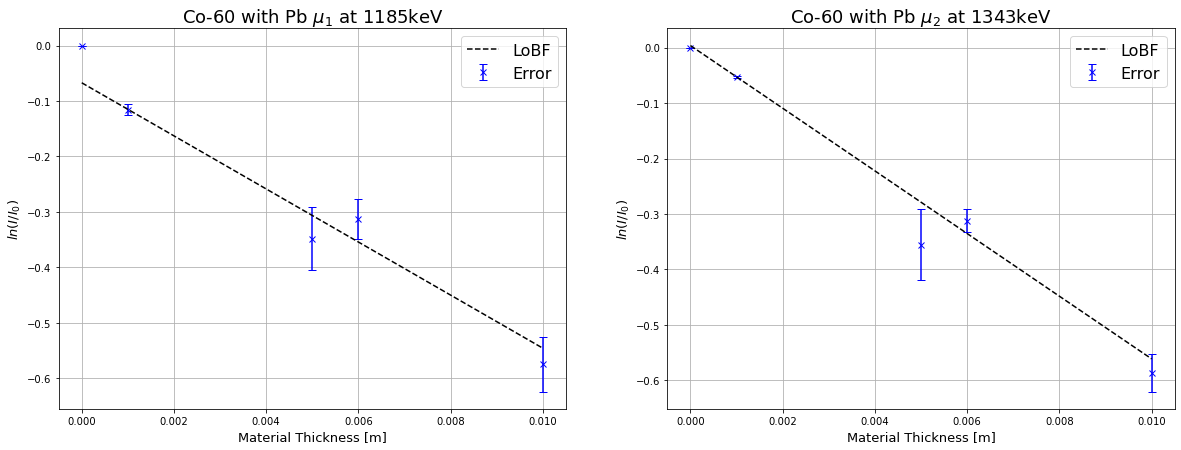

In [28]:
axs[0].plot(xvals, straightline(bestfit1[0],xvals,bestfit1[1]), linestyle='--', color='black', zorder=6, label='LoBF')
axs[1].plot(xvals, straightline(bestfit2[0],xvals,bestfit2[1]), linestyle='--', color='black', zorder=6, label='LoBF')
axs[0].legend(loc='upper right', fontsize=16)
axs[1].legend(loc='upper right', fontsize=16)
fig2

In [29]:
print(f'Linear attenuation coefficient for lead at 1185kev = {gradient1/100} +/- {grad1_err/100} 1/cm')

Linear attenuation coefficient for lead at 1185kev = -0.47878057725999873 +/- 0.04471373959196887 1/cm


In [30]:
print(f'Linear attenuation coefficient for lead at 1343kev = {gradient2/100} +/- {grad2_err/100} 1/cm')

Linear attenuation coefficient for lead at 1343kev = -0.5646922139147796 +/- 0.027885932251337498 1/cm


In [31]:
hwidth_1185 = find_x(np.log(0.5), bestfit1[0], bestfit1[1])
print(f'Half width of lead for Co-60 at 1185 keV = {hwidth_1185*100} +/- {(1/grad1_err+yint1_err)*100} cm')

Half width of lead for Co-60 at 1185 keV = 1.3075904211470797 +/- 23.608139905545784 cm


In [32]:
hwidth_1343 = find_x(np.log(0.5), bestfit2[0], bestfit2[1])
print(f'Half width of lead for Co-60 at 1343 keV = {hwidth_1343*100} +/- {(1/grad2_err+yint2_err)*100} m')

Half width of lead for Co-60 at 1343 keV = 1.233871668831085 +/- 36.23630505324583 m


## For Mixed Nuclide and Lead (Pb)

In [33]:
# Assign variables to the count rates from the data for mixed nuclide
mixPb30_2 = data2[13][3:6].mean()/100
mixPb20_1 = data2[12][6:9].mean()/100
mixPb20_2 = data2[13][6:9].mean()/100
mixPb10_1 = data2[12][9:12].mean()/100
mixPb10_2 = data2[13][9:12].mean()/100
mixPb0_1 = data2[12][12:15].mean()/100 # Count rate with zero material is I_0
mixPb0_2 = data2[13][12:15].mean()/100 # Count rate with zero material is I_0

In [34]:
# Calculate error on the mean for the count rates
mixPb30_2_err = data2[13][3:6].std(ddof=1)/100
mixPb20_1_err = data2[12][6:9].std(ddof=1)/100
mixPb20_2_err = data2[13][6:9].std(ddof=1)/100
mixPb10_1_err = data2[12][9:12].std(ddof=1)/100
mixPb10_2_err = data2[13][9:12].std(ddof=1)/100
mixPb0_1_err = data2[12][12:15].std(ddof=1)/100
mixPb0_2_err = data2[13][12:15].std(ddof=1)/100

In [35]:
# Make a material thickness array in metres
thickness = np.array([0.04,0.03,0.02,0.01,0])

In [36]:
# Find values for ln(I/I_0)
mixPb30_ln2 = np.log(mixPb30_2/mixPb0_2)
mixPb20_ln1 = np.log(mixPb20_1/mixPb0_1)
mixPb20_ln2 = np.log(mixPb20_2/mixPb0_2)
mixPb10_ln1 = np.log(mixPb10_1/mixPb0_1)
mixPb10_ln2 = np.log(mixPb10_2/mixPb0_2)
mixPb0_ln1 = np.log(mixPb0_1/mixPb0_1)
mixPb0_ln2 = np.log(mixPb0_2/mixPb0_2)

In [37]:
# Make a ln(I/I_0) array
mixpb_log_intensity1 = np.array([mixPb20_ln1, mixPb10_ln1, mixPb0_ln1])
mixpb_log_intensity2 = np.array([mixPb30_ln2, mixPb20_ln2, mixPb10_ln2, mixPb0_ln2])

In [38]:
# Find the error in ln(I/I_0)
mixPb30_ln2_err = abs(sigma_times(mixPb30_2_err,mixPb30_2, mixPb0_2_err, mixPb0_2, mixPb30_ln2))
mixPb20_ln1_err = abs(sigma_times(mixPb20_1_err,mixPb20_1, mixPb0_1_err, mixPb0_1, mixPb20_ln1))
mixPb20_ln2_err = abs(sigma_times(mixPb20_2_err,mixPb20_2, mixPb0_2_err, mixPb0_2, mixPb20_ln2))
mixPb10_ln1_err = abs(sigma_times(mixPb10_1_err,mixPb10_1, mixPb0_1_err, mixPb0_1, mixPb10_ln1))
mixPb10_ln2_err = abs(sigma_times(mixPb10_2_err,mixPb10_2, mixPb0_2_err, mixPb0_2, mixPb10_ln2))
mixPb0_ln1_err = abs(sigma_times(mixPb0_1_err,mixPb0_1, mixPb0_1_err, mixPb0_1, mixPb0_ln1))
mixPb0_ln2_err = abs(sigma_times(mixPb0_2_err,mixPb0_2, mixPb0_2_err, mixPb0_2, mixPb0_ln2))

In [39]:
# Make an error array for ln(I/I_0)
mixpb_log_intensity1_err = np.array([mixPb20_ln1_err, mixPb10_ln1_err, mixPb0_ln1_err])
mixpb_log_intensity2_err = np.array([mixPb30_ln2_err, mixPb20_ln2_err, mixPb10_ln2_err, mixPb0_ln2_err])

<ErrorbarContainer object of 3 artists>

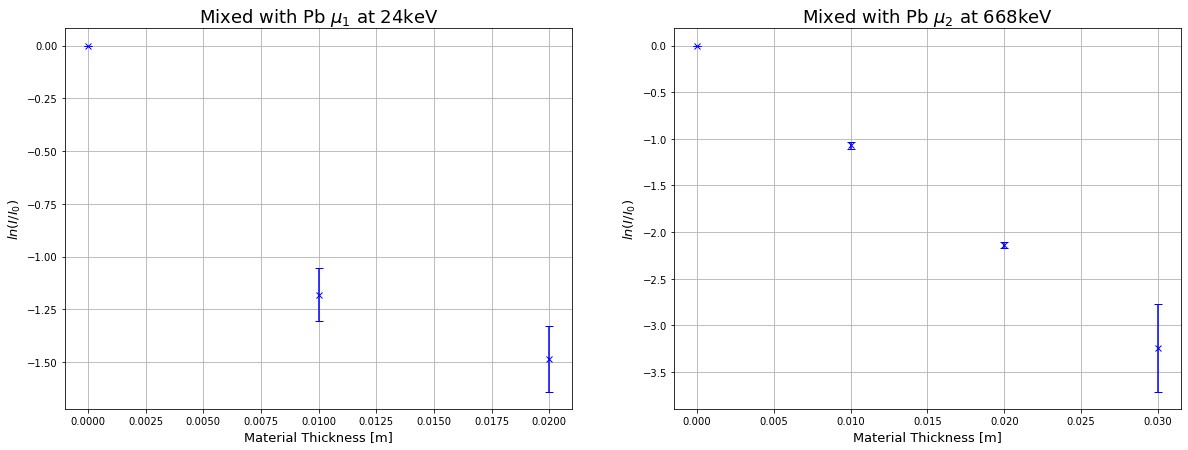

In [40]:
# Plot ln values against thickness
fig3, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)
axs[0].set_xlabel('Material Thickness [m]', fontsize=13), axs[0].set_ylabel('$ln(I/I_0)$', fontsize=13)
axs[1].set_xlabel('Material Thickness [m]', fontsize=13), axs[1].set_ylabel('$ln(I/I_0)$', fontsize=13)
axs[0].set_title('Mixed with Pb $\mu_1$ at 24keV', fontsize = 18)
axs[1].set_title('Mixed with Pb $\mu_2$ at 668keV', fontsize = 18)
axs[0].errorbar(thickness[2:5], mixpb_log_intensity1, yerr=mixpb_log_intensity1_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')
axs[1].errorbar(thickness[1:5], mixpb_log_intensity2, yerr=mixpb_log_intensity2_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')

In [41]:
initial_guess = (-1,-1)
xvals3 = np.linspace(0,0.02,101)
xvals4 = np.linspace(0,0.03,101)

bestfit3, cov3 = curve_fit(straightline, thickness[2:4], mixpb_log_intensity1[0:2], initial_guess, sigma=mixpb_log_intensity1_err[0:2], absolute_sigma=True)
bestfit3, cov3

(array([-30.25820616,  -0.87895667]),
 array([[ 4.00560085e+02, -5.58906254e+00],
        [-5.58906254e+00,  8.75598600e-02]]))

In [42]:
bestfit4, cov4 = curve_fit(straightline, thickness[1:4], mixpb_log_intensity2[0:3], initial_guess, sigma=mixpb_log_intensity2_err[0:3], absolute_sigma=True)
bestfit4, cov4

(array([-1.06534661e+02, -5.47253417e-03]),
 array([[ 2.54403192e+01, -3.98650614e-01],
        [-3.98650614e-01,  6.88622224e-03]]))

In [43]:
gradient3 = bestfit3[0]
gradient4 = bestfit4[0]
yint3 = bestfit3[1]
yint4 = bestfit4[1]
grad3_err = (cov3[0,0])**0.5
yint3_err = (cov3[1,1])**0.5
grad4_err = (cov4[0,0])**0.5
yint4_err = (cov4[1,1])**0.5

In [44]:
yint3_err

0.2959051537793573

In [45]:
grad3_err

20.013997227187275

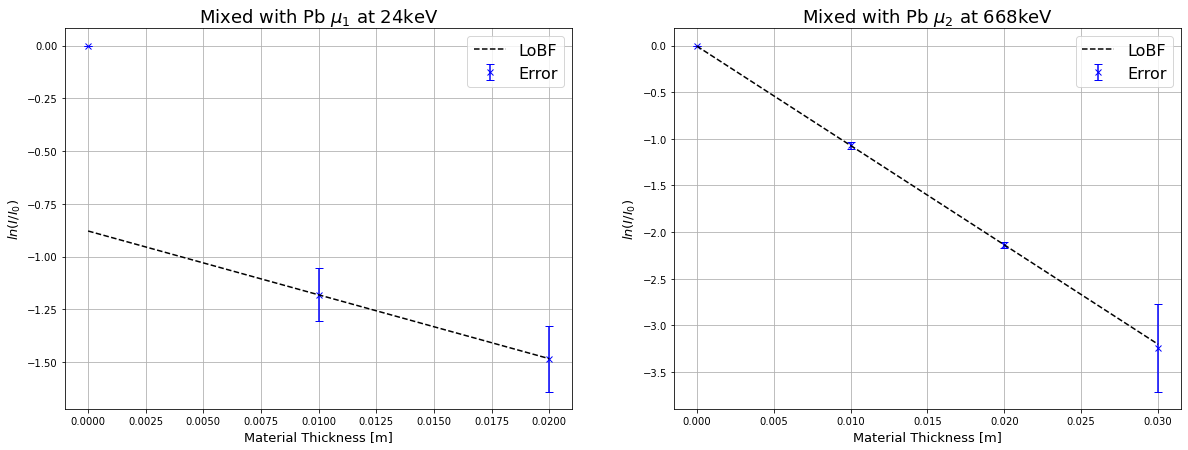

In [46]:
axs[0].plot(xvals3, straightline(bestfit3[0],xvals3,bestfit3[1]), linestyle='--', color='black', zorder=6, label='LoBF')
axs[1].plot(xvals4, straightline(bestfit4[0],xvals4,bestfit4[1]), linestyle='--', color='black', zorder=6, label='LoBF')
axs[0].legend(loc='upper right', fontsize=16)
axs[1].legend(loc='upper right', fontsize=16)
fig3

In [47]:
print(f'Linear attenuation coefficient for lead at 24kev = {gradient3/100} +/- {grad3_err/100} 1/cm')

Linear attenuation coefficient for lead at 24kev = -0.3025820615745226 +/- 0.20013997227187275 1/cm


In [48]:
print(f'Linear attenuation coefficient for lead at 668kev = {gradient4/100} +/- {grad4_err/100} 1/cm')

Linear attenuation coefficient for lead at 668kev = -1.0653466133798835 +/- 0.05043839726029515 1/cm


In [49]:
hwidth_24 = find_x(np.log(0.5), bestfit3[0], bestfit3[1])
print(f'Half width of lead for mixed source at 24 keV = {hwidth_24*100} +/- {(grad3_err+yint3_err)*100} m')

Half width of lead for mixed source at 24 keV = -0.6140796594560591 +/- 2030.9902380966632 m


In [50]:
hwidth_668 = find_x(np.log(0.5), bestfit4[0], bestfit4[1])
print(f'Half width of lead for mixed source at 668 keV = {hwidth_668*100} +/- {(grad4_err+yint4_err)*100} m')

Half width of lead for mixed source at 668 keV = 0.64549381182914 +/- 512.6822990840844 m


## For Co-60 and Aluminium (Al)

In [51]:
# Assign variables to the count rates from the data for Co-60
coAl40_1 = data2[19][0:3].mean()/100
coAl40_2 = data2[20][0:3].mean()/100
coAl30_1 = data2[19][3:6].mean()/100
coAl30_2 = data2[20][3:6].mean()/100
coAl20_1 = data2[19][6:9].mean()/100
coAl20_2 = data2[20][6:9].mean()/100
coAl10_1 = data2[19][9:12].mean()/100
coAl10_2 = data2[20][9:12].mean()/100
coAl0_1 = data2[19][12:15].mean()/100 # Count rate with zero material is I_0
coAl0_2 = data2[20][12:15].mean()/100 # Count rate with zero material is I_0

In [52]:
# Calculate error on the mean for the count rates
coAl40_1_err = data2[19][0:3].std(ddof=1)/100
coAl40_2_err = data2[20][0:3].std(ddof=1)/100
coAl30_1_err = data2[19][3:6].std(ddof=1)/100
coAl30_2_err = data2[20][3:6].std(ddof=1)/100
coAl20_1_err = data2[19][6:9].std(ddof=1)/100
coAl20_2_err = data2[20][6:9].std(ddof=1)/100
coAl10_1_err = data2[19][9:12].std(ddof=1)/100
coAl10_2_err = data2[20][9:12].std(ddof=1)/100
coAl0_1_err = data2[19][12:15].std(ddof=1)/100
coAl0_2_err = data2[20][12:15].std(ddof=1)/100

In [53]:
# Make a material thickness array in metres
thickness = np.array([0.04,0.03,0.02,0.01,0])

In [54]:
# Find values for ln(I/I_0)
coAl40_ln1 = np.log(coAl40_1/coAl0_1)
coAl40_ln2 = np.log(coAl40_2/coAl0_2)
coAl30_ln1 = np.log(coAl30_1/coAl0_1)
coAl30_ln2 = np.log(coAl30_2/coAl0_2)
coAl20_ln1 = np.log(coAl20_1/coAl0_1)
coAl20_ln2 = np.log(coAl20_2/coAl0_2)
coAl10_ln1 = np.log(coAl10_1/coAl0_1)
coAl10_ln2 = np.log(coAl10_2/coAl0_2)
coAl0_ln1 = np.log(coAl0_1/coAl0_1)
coAl0_ln2 = np.log(coAl0_2/coAl0_2)

In [55]:
# Make a ln(I/I_0) array
coAl_log_intensity1 = np.array([coAl40_ln1, coAl30_ln1, coAl20_ln1, coAl10_ln1, coAl0_ln1])
coAl_log_intensity2 = np.array([coAl40_ln2, coAl30_ln2, coAl20_ln2, coAl10_ln2, coAl0_ln2])

In [56]:
# Find the error in ln(I/I_0)
coAl40_ln1_err = abs(sigma_times(coAl40_1_err,coAl40_1, coAl0_1_err, coAl0_1, coAl40_ln1))
coAl40_ln2_err = abs(sigma_times(coAl40_2_err,coAl40_2, coAl0_2_err, coAl0_2, coAl40_ln2))
coAl30_ln1_err = abs(sigma_times(coAl30_1_err,coAl30_1, coAl0_1_err, coAl0_1, coAl30_ln1))
coAl30_ln2_err = abs(sigma_times(coAl30_2_err,coAl30_2, coAl0_2_err, coAl0_2, coAl30_ln2))
coAl20_ln1_err = abs(sigma_times(coAl20_1_err,coAl20_1, coAl0_1_err, coAl0_1, coAl20_ln1))
coAl20_ln2_err = abs(sigma_times(coAl20_2_err,coAl20_2, coAl0_2_err, coAl0_2, coAl20_ln2))
coAl10_ln1_err = abs(sigma_times(coAl10_1_err,coAl10_1, coAl0_1_err, coAl0_1, coAl10_ln1))
coAl10_ln2_err = abs(sigma_times(coAl10_2_err,coAl10_2, coAl0_2_err, coAl0_2, coAl10_ln2))
coAl0_ln1_err = abs(sigma_times(coAl0_1_err,coAl0_1, coAl0_1_err, coAl0_1, coAl0_ln1))
coAl0_ln2_err = abs(sigma_times(coAl0_2_err,coAl0_2, coAl0_2_err, coAl0_2, coAl0_ln2))

In [57]:
# Make an error array for ln(I/I_0)
coAl_log_intensity1_err = np.array([coAl40_ln1_err, coAl30_ln1_err, coAl20_ln1_err, coAl10_ln1_err, coAl0_ln1_err])
coAl_log_intensity2_err = np.array([coAl40_ln2_err, coAl30_ln2_err, coAl20_ln2_err, coAl10_ln2_err, coAl0_ln2_err])

<ErrorbarContainer object of 3 artists>

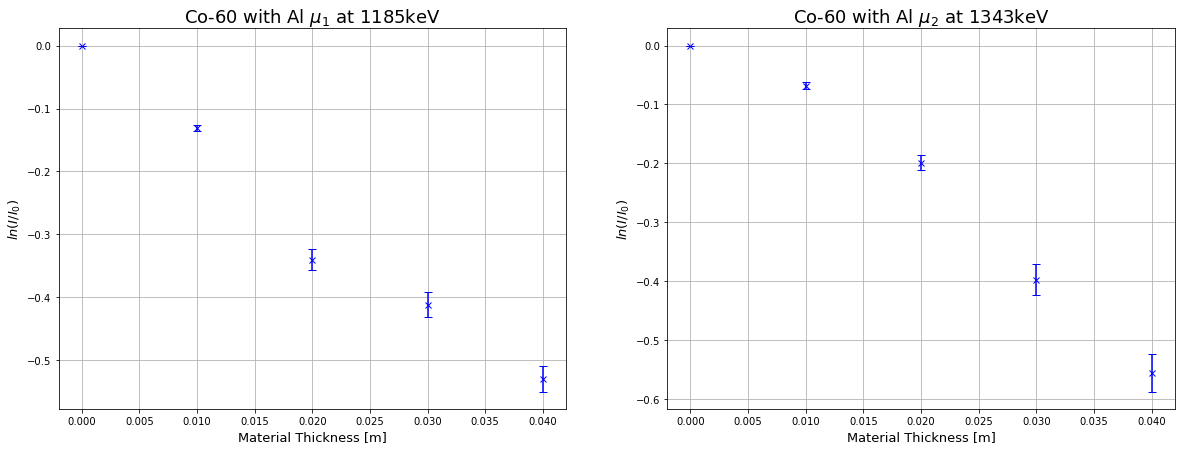

In [58]:
# Plot ln values against thickness
fig4, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)
axs[0].set_xlabel('Material Thickness [m]', fontsize=13), axs[0].set_ylabel('$ln(I/I_0)$', fontsize=13)
axs[1].set_xlabel('Material Thickness [m]', fontsize=13), axs[1].set_ylabel('$ln(I/I_0)$', fontsize=13)
axs[0].set_title('Co-60 with Al $\mu_1$ at 1185keV', fontsize = 18)
axs[1].set_title('Co-60 with Al $\mu_2$ at 1343keV', fontsize = 18)
axs[0].errorbar(thickness, coAl_log_intensity1, yerr=coAl_log_intensity1_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')
axs[1].errorbar(thickness, coAl_log_intensity2, yerr=coAl_log_intensity2_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')

In [59]:
initial_guess = (-1,-1)
xvals5 = np.linspace(0,0.04,101)

bestfit5, cov5 = curve_fit(straightline, thickness[0:4], coAl_log_intensity1[0:4], initial_guess, sigma=coAl_log_intensity1_err[0:4], absolute_sigma=True)
bestfit5, cov5

(array([-1.40896926e+01,  5.78594309e-03]),
 array([[ 3.30973183e-01, -4.50654115e-03],
        [-4.50654115e-03,  8.36469536e-05]]))

In [60]:
bestfit6, cov6 = curve_fit(straightline, thickness[0:4], coAl_log_intensity2[0:4], initial_guess, sigma=coAl_log_intensity2_err[0:4], absolute_sigma=True)
bestfit6, cov6

(array([-15.50557515,   0.09007861]),
 array([[ 5.78074666e-01, -7.67432342e-03],
        [-7.67432342e-03,  1.28079476e-04]]))

In [61]:
gradient5 = bestfit5[0]
gradient6 = bestfit6[0]
yint5 = bestfit5[1]
yint6 = bestfit6[1]
grad5_err = (cov5[0,0])**0.5
yint5_err = (cov5[1,1])**0.5
grad6_err = (cov6[0,0])**0.5
yint6_err = (cov6[1,1])**0.5

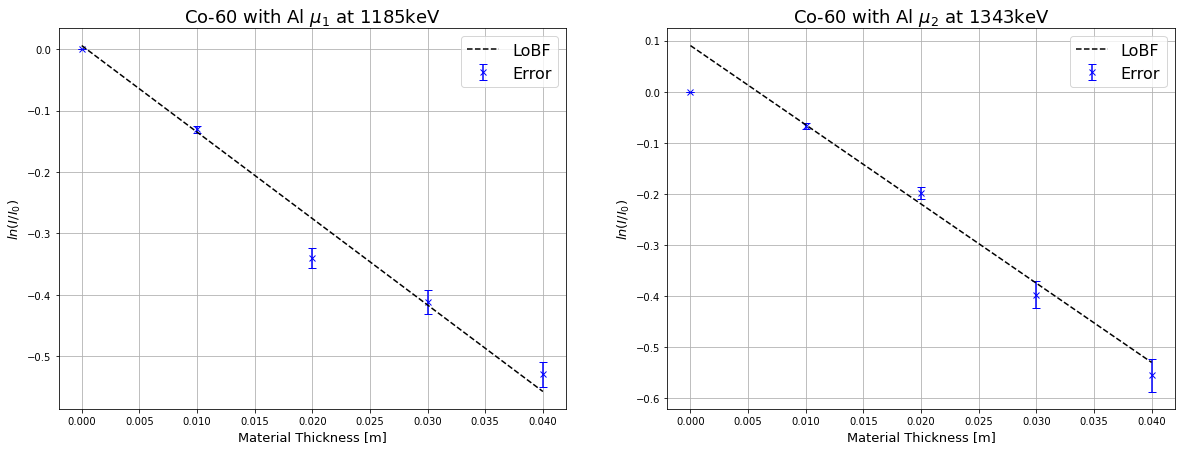

In [62]:
axs[0].plot(xvals5, straightline(bestfit5[0],xvals5,bestfit5[1]), linestyle='--', color='black', zorder=6, label='LoBF')
axs[1].plot(xvals5, straightline(bestfit6[0],xvals5,bestfit6[1]), linestyle='--', color='black', zorder=6, label='LoBF')
axs[0].legend(loc='upper right', fontsize=16)
axs[1].legend(loc='upper right', fontsize=16)
fig4

In [63]:
print(f'Linear attenuation coefficient for aluminium at 1185kev = {gradient5/100} +/- {grad5_err/100} 1/cm')

Linear attenuation coefficient for aluminium at 1185kev = -0.14089692625101521 +/- 0.005753026879072896 1/cm


In [64]:
print(f'Linear attenuation coefficient for aluminium at 1343kev = {gradient6/100} +/- {grad6_err/100} 1/cm')

Linear attenuation coefficient for aluminium at 1343kev = -0.15505575147035397 +/- 0.00760312216038114 1/cm


In [65]:
hwidth_1185 = find_x(np.log(0.5), bestfit5[0], bestfit5[1])
print(f'Half width of aluminium for Co-60 at 1185 keV = {hwidth_1185*100} +/- {(grad5_err+yint5_err)*100} m')

Half width of aluminium for Co-60 at 1185 keV = 4.9605988025693515 +/- 58.44485587575585 m


In [66]:
hwidth_1343 = find_x(np.log(0.5), bestfit6[0], bestfit6[1])
print(f'Half width of aluminium for Co-60 at 1343 keV = {hwidth_1343*100} +/- {(grad6_err+yint6_err)*100} m')

Half width of aluminium for Co-60 at 1343 keV = 5.051252728848991 +/- 77.16294363897849 m


## For Mixed Nuclide and Aluminium (Al)

In [67]:
# Assign variables to the count rates from the data for mixed nuclide
mixAl40_2 = data2[27][0:3].mean()/100
mixAl30_1 = data2[26][3:6].mean()/100
mixAl30_2 = data2[27][3:6].mean()/100
mixAl20_1 = data2[26][6:9].mean()/100
mixAl20_2 = data2[27][6:9].mean()/100
mixAl10_1 = data2[26][9:12].mean()/100
mixAl10_2 = data2[27][9:12].mean()/100
mixAl0_1 = data2[26][12:15].mean()/100
mixAl0_2 = data2[27][12:15].mean()/100

In [68]:
# Calculate error on the mean for the count rates
mixAl40_2_err = data2[27][0:3].std(ddof=1)/100
mixAl30_1_err = data2[26][3:6].std(ddof=1)/100
mixAl30_2_err = data2[27][3:6].std(ddof=1)/100
mixAl20_1_err = data2[26][6:9].std(ddof=1)/100
mixAl20_2_err = data2[27][6:9].std(ddof=1)/100
mixAl10_1_err = data2[26][9:12].std(ddof=1)/100
mixAl10_2_err = data2[27][9:12].std(ddof=1)/100
mixAl0_1_err = data2[26][12:15].std(ddof=1)/100
mixAl0_2_err = data2[27][12:15].std(ddof=1)/100

In [69]:
# Make a material thickness array in metres
thickness = np.array([0.04,0.03,0.02,0.01,0])

In [70]:
# Find values for ln(I/I_0)
mixAl40_ln2 = np.log(mixAl40_2/mixAl0_2)
mixAl30_ln1 = np.log(mixAl30_1/mixAl0_1)
mixAl30_ln2 = np.log(mixAl30_2/mixAl0_2)
mixAl20_ln1 = np.log(mixAl20_1/mixAl0_1)
mixAl20_ln2 = np.log(mixAl20_2/mixAl0_2)
mixAl10_ln1 = np.log(mixAl10_1/mixAl0_1)
mixAl10_ln2 = np.log(mixAl10_2/mixAl0_2)
mixAl0_ln1 = np.log(mixAl0_1/mixAl0_1)
mixAl0_ln2 = np.log(mixAl0_2/mixAl0_2)

In [71]:
# Make a ln(I/I_0) array
mixal_log_intensity1 = np.array([mixAl30_ln1, mixAl20_ln1, mixAl10_ln1, mixAl0_ln1])
mixal_log_intensity2 = np.array([mixAl40_ln2, mixAl30_ln2, mixAl20_ln2, mixAl10_ln2, mixAl0_ln2])

In [72]:
# Find the error in ln(I/I_0)
mixAl40_ln2_err = abs(sigma_times(mixAl40_2_err, mixAl40_2, mixAl0_2_err, mixAl0_2, mixAl40_ln2))
mixAl30_ln1_err = abs(sigma_times(mixAl30_1_err, mixAl30_1, mixAl0_1_err, mixAl0_1, mixAl30_ln1))
mixAl30_ln2_err = abs(sigma_times(mixAl30_2_err, mixAl30_2, mixAl0_2_err, mixAl0_2, mixAl30_ln2))
mixAl20_ln1_err = abs(sigma_times(mixAl20_1_err, mixAl20_1, mixAl0_1_err, mixAl0_1, mixAl20_ln1))
mixAl20_ln2_err = abs(sigma_times(mixAl20_2_err, mixAl20_2, mixAl0_2_err, mixAl0_2, mixAl20_ln2))
mixAl10_ln1_err = abs(sigma_times(mixAl10_1_err, mixAl10_1, mixAl0_1_err, mixAl0_1, mixAl10_ln1))
mixAl10_ln2_err = abs(sigma_times(mixAl10_2_err, mixAl10_2, mixAl0_2_err, mixAl0_2, mixAl10_ln2))
mixAl0_ln1_err = abs(sigma_times(mixAl0_1_err, mixAl0_1, mixAl0_1_err, mixAl0_1, mixAl0_ln1))
mixAl0_ln2_err = abs(sigma_times(mixAl0_2_err, mixAl0_2, mixAl0_2_err, mixAl0_2, mixAl0_ln2))

In [73]:
# Make an error array for ln(I/I_0)
mixal_log_intensity1_err = np.array([mixAl30_ln1_err, mixAl20_ln1_err, mixAl10_ln1_err, mixAl0_ln1_err])
mixal_log_intensity2_err = np.array([mixAl40_ln2_err, mixAl30_ln2_err, mixAl20_ln2_err, mixAl10_ln2_err, mixAl0_ln2_err])

<ErrorbarContainer object of 3 artists>

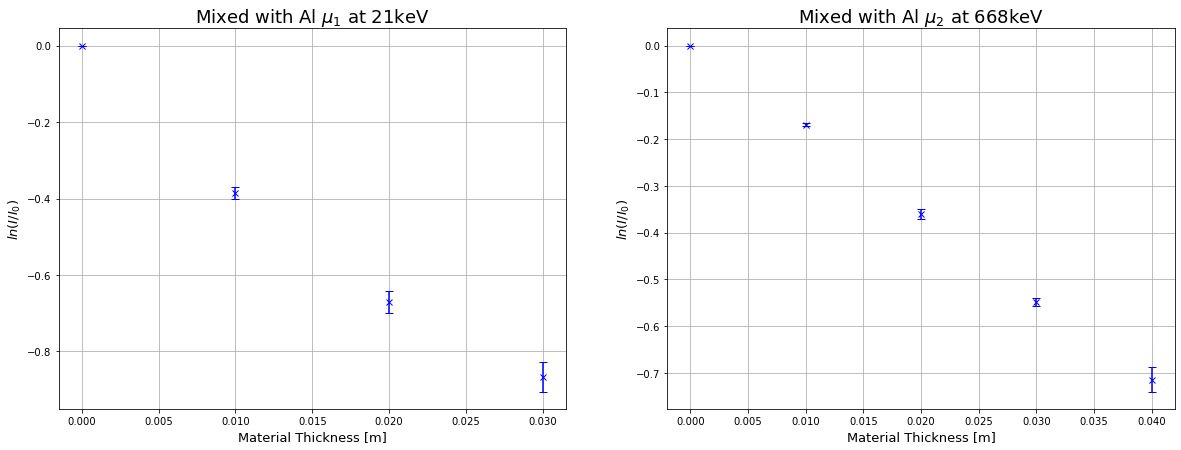

In [74]:
# Plot ln values against thickness
fig5, axs = plt.subplots(1,2, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True)
axs[0].set_xlabel('Material Thickness [m]', fontsize=13), axs[0].set_ylabel('$ln(I/I_0)$', fontsize=13)
axs[1].set_xlabel('Material Thickness [m]', fontsize=13), axs[1].set_ylabel('$ln(I/I_0)$', fontsize=13)
axs[0].set_title('Mixed with Al $\mu_1$ at 21keV', fontsize = 18)
axs[1].set_title('Mixed with Al $\mu_2$ at 668keV', fontsize = 18)
axs[0].errorbar(thickness[1:5], mixal_log_intensity1, yerr=mixal_log_intensity1_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')
axs[1].errorbar(thickness, mixal_log_intensity2, yerr=mixal_log_intensity2_err, color='blue', marker='x', capsize=4, linestyle='', zorder=4, label='Error')

In [75]:
initial_guess = (-1,-1)
xvals6 = np.linspace(0,0.03,101)
xvals7 = np.linspace(0,0.04,101)

bestfit7, cov7 = curve_fit(straightline, thickness[1:4], mixal_log_intensity1[0:3], initial_guess, sigma=mixal_log_intensity1_err[0:3], absolute_sigma=True)
bestfit7, cov7

(array([-25.07505033,  -0.13985141]),
 array([[ 3.63166275e+00, -5.23452153e-02],
        [-5.23452153e-02,  9.28634772e-04]]))

In [76]:
bestfit8, cov8 = curve_fit(straightline, thickness[:4], mixal_log_intensity2[:4], initial_guess, sigma=mixal_log_intensity2_err[:4], absolute_sigma=True)
bestfit8, cov8

(array([-18.81482495,   0.01887152]),
 array([[ 1.62210194e-01, -1.99220325e-03],
        [-1.99220325e-03,  3.06781838e-05]]))

In [77]:
gradient7 = bestfit7[0]
gradient8 = bestfit8[0]
yint7 = bestfit7[1]
yint8 = bestfit8[1]
grad7_err = (cov7[0,0])**0.5
yint7_err = (cov7[1,1])**0.5
grad8_err = (cov8[0,0])**0.5
yint8_err = (cov8[1,1])**0.5

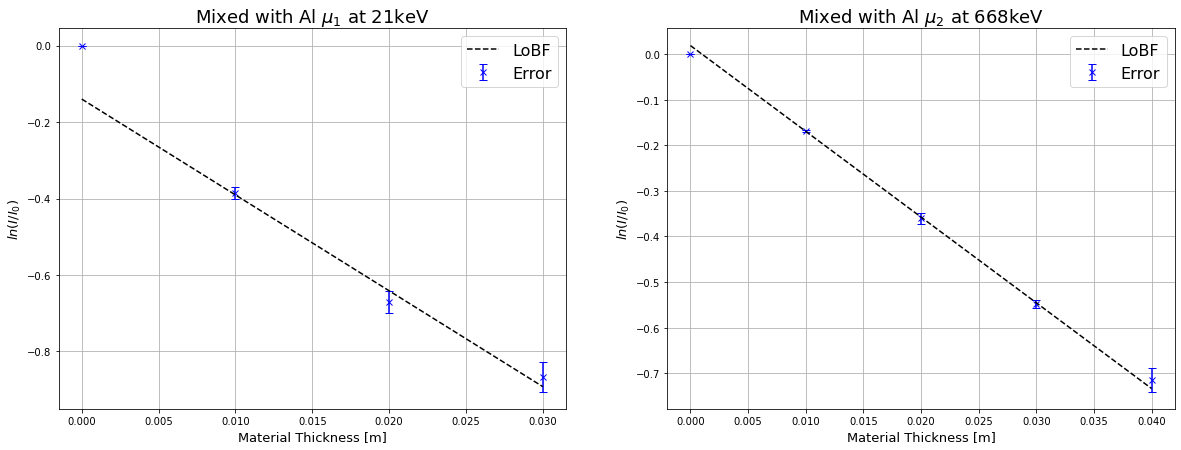

In [78]:
axs[0].plot(xvals6, straightline(bestfit7[0],xvals6,bestfit7[1]), linestyle='--', color='black', zorder=6, label='LoBF')
axs[1].plot(xvals7, straightline(bestfit8[0],xvals7,bestfit8[1]), linestyle='--', color='black', zorder=6, label='LoBF')
axs[0].legend(loc='upper right', fontsize=16)
axs[1].legend(loc='upper right', fontsize=16)
fig5

In [79]:
print(f'Linear attenuation coefficient for aluminium at 21kev = {gradient7/100} +/- {grad7_err/100} 1/cm')

Linear attenuation coefficient for aluminium at 21kev = -0.2507505033360102 +/- 0.019056921968736828 1/cm


In [80]:
print(f'Linear attenuation coefficient for aluminium at 668kev = {gradient8/100} +/- {grad8_err/100} 1/cm')

Linear attenuation coefficient for aluminium at 668kev = -0.18814824953059692 +/- 0.004027532665768836 1/cm


In [81]:
hwidth_24 = find_x(np.log(0.5), bestfit7[0], bestfit7[1])
print(f'Half width of aluminium for mixed source at 21 keV = {hwidth_24*100} +/- {(grad7_err+yint7_err)*100} m')

Half width of aluminium for mixed source at 21 keV = 2.2065589783353006 +/- 193.61657062149632 m


In [82]:
hwidth_668 = find_x(np.log(0.5), bestfit8[0], bestfit8[1])
print(f'Half width of aluminium for mixed source at 668 keV = {hwidth_668*100} +/- {(grad8_err+yint8_err)*100} m')

Half width of aluminium for mixed source at 668 keV = 3.784349326402113 +/- 40.8292055597518 m


In [83]:
fig5.savefig('Mix,Al_data.png', dpi=300)